# Library

In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split


# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score

# Modeling
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer


# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import plotly 
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import shap
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

import tensorflow as tf
from tensorflow import keras
import kerastuner as kt
from pycaret.regression import *

# 데이터 불러오기

In [2]:
# 학습용과 평가용(제출용) 데이터를 읽어들인다.
train = pd.read_csv('train_df.csv',encoding='cp949')
test = pd.read_csv('test_df.csv',encoding='cp949')

# 분석에 필요없는 INDEX 필드를 데이터에서 제거
#train_index = train['index']
#test_index = test['index']
#del train['index'], test['index']

# 학습용 정답 데이터를 읽는다.
target = pd.read_csv('train_df.csv',encoding='cp949').INVC_CONT

#submission 데이터를 읽는다.
submission = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT
0,0,1129000014045300,5011000220046300,패션의류,상의,3
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,3
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,9
3,3,1154500002014200,5011000315087400,식품,농산물,10
4,4,1165000021008300,5011000177051200,식품,가공식품,3


In [4]:
test.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM
0,32000,5013000043028400,1165000021097200,식품,농산물
1,32001,5013000044016100,1154500002066400,식품,농산물
2,32002,5013000205030200,4139000102013200,식품,농산물
3,32003,5013000205030200,4221000040093400,식품,농산물
4,32004,5013000268011400,2726000004017100,식품,농산물


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          32000 non-null  int64 
 1   SEND_SPG_INNB  32000 non-null  int64 
 2   REC_SPG_INNB   32000 non-null  int64 
 3   DL_GD_LCLS_NM  32000 non-null  object
 4   DL_GD_MCLS_NM  32000 non-null  object
 5   INVC_CONT      32000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          4640 non-null   int64 
 1   SEND_SPG_INNB  4640 non-null   int64 
 2   REC_SPG_INNB   4640 non-null   int64 
 3   DL_GD_LCLS_NM  4640 non-null   object
 4   DL_GD_MCLS_NM  4640 non-null   object
dtypes: int64(3), object(2)
memory usage: 181.4+ KB


## 공공데이터 불러오기 및 학습데이터와의 병합

In [7]:
opendata1 = pd.read_csv('TC_NU_SPG_50_METER_50.csv',encoding='UTF-8')
opendata2 = pd.read_csv('TC_NU_SPG_50_METER_48.csv',encoding='UTF-8')
opendata3 = pd.read_csv('TC_NU_SPG_50_METER_47.csv',encoding='UTF-8')
opendata4 = pd.read_csv('TC_NU_SPG_50_METER_46.csv',encoding='UTF-8')
opendata5 = pd.read_csv('TC_NU_SPG_50_METER_45.csv',encoding='UTF-8')
opendata6 = pd.read_csv('TC_NU_SPG_50_METER_44.csv',encoding='UTF-8')
opendata7 = pd.read_csv('TC_NU_SPG_50_METER_43.csv',encoding='UTF-8')
opendata8 = pd.read_csv('TC_NU_SPG_50_METER_42.csv',encoding='UTF-8')
opendata9 = pd.read_csv('TC_NU_SPG_50_METER_41.csv',encoding='UTF-8')
opendata10 = pd.read_csv('TC_NU_SPG_50_METER_36.csv',encoding='UTF-8')
opendata11 = pd.read_csv('TC_NU_SPG_50_METER_31.csv',encoding='UTF-8')
opendata12 = pd.read_csv('TC_NU_SPG_50_METER_30.csv',encoding='UTF-8')
opendata13 = pd.read_csv('TC_NU_SPG_50_METER_29.csv',encoding='UTF-8')
opendata14 = pd.read_csv('TC_NU_SPG_50_METER_28.csv',encoding='UTF-8')
opendata15 = pd.read_csv('TC_NU_SPG_50_METER_27.csv',encoding='UTF-8')
opendata16 = pd.read_csv('TC_NU_SPG_50_METER_26.csv',encoding='UTF-8')
opendata17 = pd.read_csv('TC_NU_SPG_50_METER_11.csv',encoding='UTF-8')

In [8]:
opendata1['지역구분'] = '제주'
opendata2['지역구분'] = '경상남도'
opendata3['지역구분'] = '경상북도'
opendata4['지역구분'] = '전라남도'
opendata5['지역구분'] = '전라북도'
opendata6['지역구분'] = '충청남도'
opendata7['지역구분'] = '충청북도'
opendata8['지역구분'] = '강원도'
opendata9['지역구분'] = '경기도'
opendata10['지역구분'] = '세종'
opendata11['지역구분'] = '울산'
opendata12['지역구분'] = '인천'
opendata13['지역구분'] = '광주'
opendata14['지역구분'] = '인천'
opendata15['지역구분'] = '대구'
opendata16['지역구분'] = '부산'
opendata17['지역구분'] = '서울'

In [9]:
opendata = pd.concat([opendata1,opendata2,opendata3,opendata4,opendata5,opendata6,opendata7,opendata8,opendata9,opendata10,opendata11,opendata12,opendata13,opendata14,opendata15,opendata16,opendata17],axis=0)
opendata

,격자공간고유번호,격자공간명,시군구코드,시군구명,지역구분
0,5011000001001100,나다9058,50110,제주시,제주
1,5011000001001200,나다9058,50110,제주시,제주
2,5011000001001300,나다9058,50110,제주시,제주
3,5011000001001400,나다9058,50110,제주시,제주
4,5011000001002100,나다9058,50110,제주시,제주
...,...,...,...,...,...
241995,1174000025099400,다사6846,11740,강동구,서울
241996,1174000025100100,다사6846,11740,강동구,서울
241997,1174000025100200,다사6846,11740,강동구,서울
241998,1174000025100300,다사6846,11740,강동구,서울


In [10]:
opendata = opendata.reset_index()

In [11]:
opendata = opendata.drop(columns=['index'])
opendata

,격자공간고유번호,격자공간명,시군구코드,시군구명,지역구분
0,5011000001001100,나다9058,50110,제주시,제주
1,5011000001001200,나다9058,50110,제주시,제주
2,5011000001001300,나다9058,50110,제주시,제주
3,5011000001001400,나다9058,50110,제주시,제주
4,5011000001002100,나다9058,50110,제주시,제주
...,...,...,...,...,...
43369995,1174000025099400,다사6846,11740,강동구,서울
43369996,1174000025100100,다사6846,11740,강동구,서울
43369997,1174000025100200,다사6846,11740,강동구,서울
43369998,1174000025100300,다사6846,11740,강동구,서울


In [12]:
opendata_ = opendata.copy()

In [13]:
opendata = opendata.rename(columns={'격자공간고유번호':'SEND_SPG_INNB','격자공간명':'SEND_SPG_NM','시군구코드':'SEND_SIGUNGU','시군구명':'SEND_SIGUNGU_NM','지역구분':'SEND_REGION'})
opendata_ = opendata_.rename(columns={'격자공간고유번호':'REC_SPG_INNB','격자공간명':'REC_SPG_NM','시군구코드':'REC_SIGUNGU','시군구명':'REC_SIGUNGU_NM','지역구분':'REC_REGION'})

In [14]:
display(opendata)
display(opendata_)

,SEND_SPG_INNB,SEND_SPG_NM,SEND_SIGUNGU,SEND_SIGUNGU_NM,SEND_REGION
0,5011000001001100,나다9058,50110,제주시,제주
1,5011000001001200,나다9058,50110,제주시,제주
2,5011000001001300,나다9058,50110,제주시,제주
3,5011000001001400,나다9058,50110,제주시,제주
4,5011000001002100,나다9058,50110,제주시,제주
...,...,...,...,...,...
43369995,1174000025099400,다사6846,11740,강동구,서울
43369996,1174000025100100,다사6846,11740,강동구,서울
43369997,1174000025100200,다사6846,11740,강동구,서울
43369998,1174000025100300,다사6846,11740,강동구,서울


,REC_SPG_INNB,REC_SPG_NM,REC_SIGUNGU,REC_SIGUNGU_NM,REC_REGION
0,5011000001001100,나다9058,50110,제주시,제주
1,5011000001001200,나다9058,50110,제주시,제주
2,5011000001001300,나다9058,50110,제주시,제주
3,5011000001001400,나다9058,50110,제주시,제주
4,5011000001002100,나다9058,50110,제주시,제주
...,...,...,...,...,...
43369995,1174000025099400,다사6846,11740,강동구,서울
43369996,1174000025100100,다사6846,11740,강동구,서울
43369997,1174000025100200,다사6846,11740,강동구,서울
43369998,1174000025100300,다사6846,11740,강동구,서울


In [15]:
train = pd.merge(train, opendata, how='left', on='SEND_SPG_INNB')

In [16]:
train = pd.merge(train, opendata_, how='left', on='REC_SPG_INNB')

In [17]:
train.drop(columns=['INVC_CONT','SEND_SIGUNGU','REC_SIGUNGU'],inplace=True)

In [18]:
train.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,SEND_SPG_NM,SEND_SIGUNGU_NM,SEND_REGION,REC_SPG_NM,REC_SIGUNGU_NM,REC_REGION
0,0,1129000014045300,5011000220046300,패션의류,상의,다사6156,성북구,서울,다다1502,제주시,제주
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,다사6163,노원구,서울,다다1903,제주시,제주
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,다사6158,노원구,서울,다다1001,제주시,제주
3,3,1154500002014200,5011000315087400,식품,농산물,다사4541,금천구,서울,다다0600,제주시,제주
4,4,1165000021008300,5011000177051200,식품,가공식품,다사5942,서초구,서울,다다1803,제주시,제주


In [19]:
test

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM
0,32000,5013000043028400,1165000021097200,식품,농산물
1,32001,5013000044016100,1154500002066400,식품,농산물
2,32002,5013000205030200,4139000102013200,식품,농산물
3,32003,5013000205030200,4221000040093400,식품,농산물
4,32004,5013000268011400,2726000004017100,식품,농산물
...,...,...,...,...,...
4635,36635,5013000858004400,4725000719072200,식품,농산물
4636,36636,5013000870018300,2826000106075300,식품,농산물
4637,36637,5013000897086300,4311100034004300,식품,농산물
4638,36638,5013000902065100,4145000013011200,식품,농산물


In [20]:
test = pd.merge(test, opendata, how='left', on='SEND_SPG_INNB')
test = pd.merge(test, opendata_, how='left', on='REC_SPG_INNB')

In [21]:
test.drop(columns=['SEND_SIGUNGU','REC_SIGUNGU'],inplace=True)

In [24]:
train.to_csv('train_all.csv',index=False)
test.to_csv('test_all.csv',index=False)

# Feature Engineering

In [25]:
train.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,SEND_SPG_NM,SEND_SIGUNGU_NM,SEND_REGION,REC_SPG_NM,REC_SIGUNGU_NM,REC_REGION
0,0,1129000014045300,5011000220046300,패션의류,상의,다사6156,성북구,서울,다다1502,제주시,제주
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,다사6163,노원구,서울,다다1903,제주시,제주
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,다사6158,노원구,서울,다다1001,제주시,제주
3,3,1154500002014200,5011000315087400,식품,농산물,다사4541,금천구,서울,다다0600,제주시,제주
4,4,1165000021008300,5011000177051200,식품,가공식품,다사5942,서초구,서울,다다1803,제주시,제주


In [26]:
train = pd.concat([train,target],axis=1)

In [27]:
train.corr()
#유일한 수치형 변수인 SEND_SPG_INNB와 REC_SPG_INNB가 INVC_CONT와 상관관계가 없다...
#말그대로 택배를 보내는 곳과 받는 곳의 격자공간고유번호를 수치로 표현한 것이기 때문이라 생각
#그러나 SEND_SPG_INNB와와 REC_SPG_INNB사이에는 상관관계가 다소 존재

,index,SEND_SPG_INNB,REC_SPG_INNB,INVC_CONT
index,1.000000,0.008242,-0.002749,-0.006936
SEND_SPG_INNB,0.008242,1.000000,-0.375218,-0.058702
REC_SPG_INNB,-0.002749,-0.375218,1.000000,0.063201
INVC_CONT,-0.006936,-0.058702,0.063201,1.000000


In [28]:
train.sort_values(by='SEND_SPG_INNB')[['SEND_SPG_INNB','SEND_SIGUNGU_NM']]
#격자공간고유번호는 제주도를 기준으로 위도가 상승할수록 증가하는 경향이 있음

,SEND_SPG_INNB,SEND_SIGUNGU_NM
16521,1111000015066100,종로구
8458,1111000017015300,종로구
5187,1111000019090400,종로구
28455,1111000019090400,종로구
7565,1111000019090400,종로구
...,...,...
9067,5013000946025300,서귀포시
6405,5013000946029100,서귀포시
16799,5013000946029100,서귀포시
22009,5013000946029100,서귀포시


In [29]:
#시각화 설정
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 15
# 사용자 운영체제 확인
import os
os.name

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

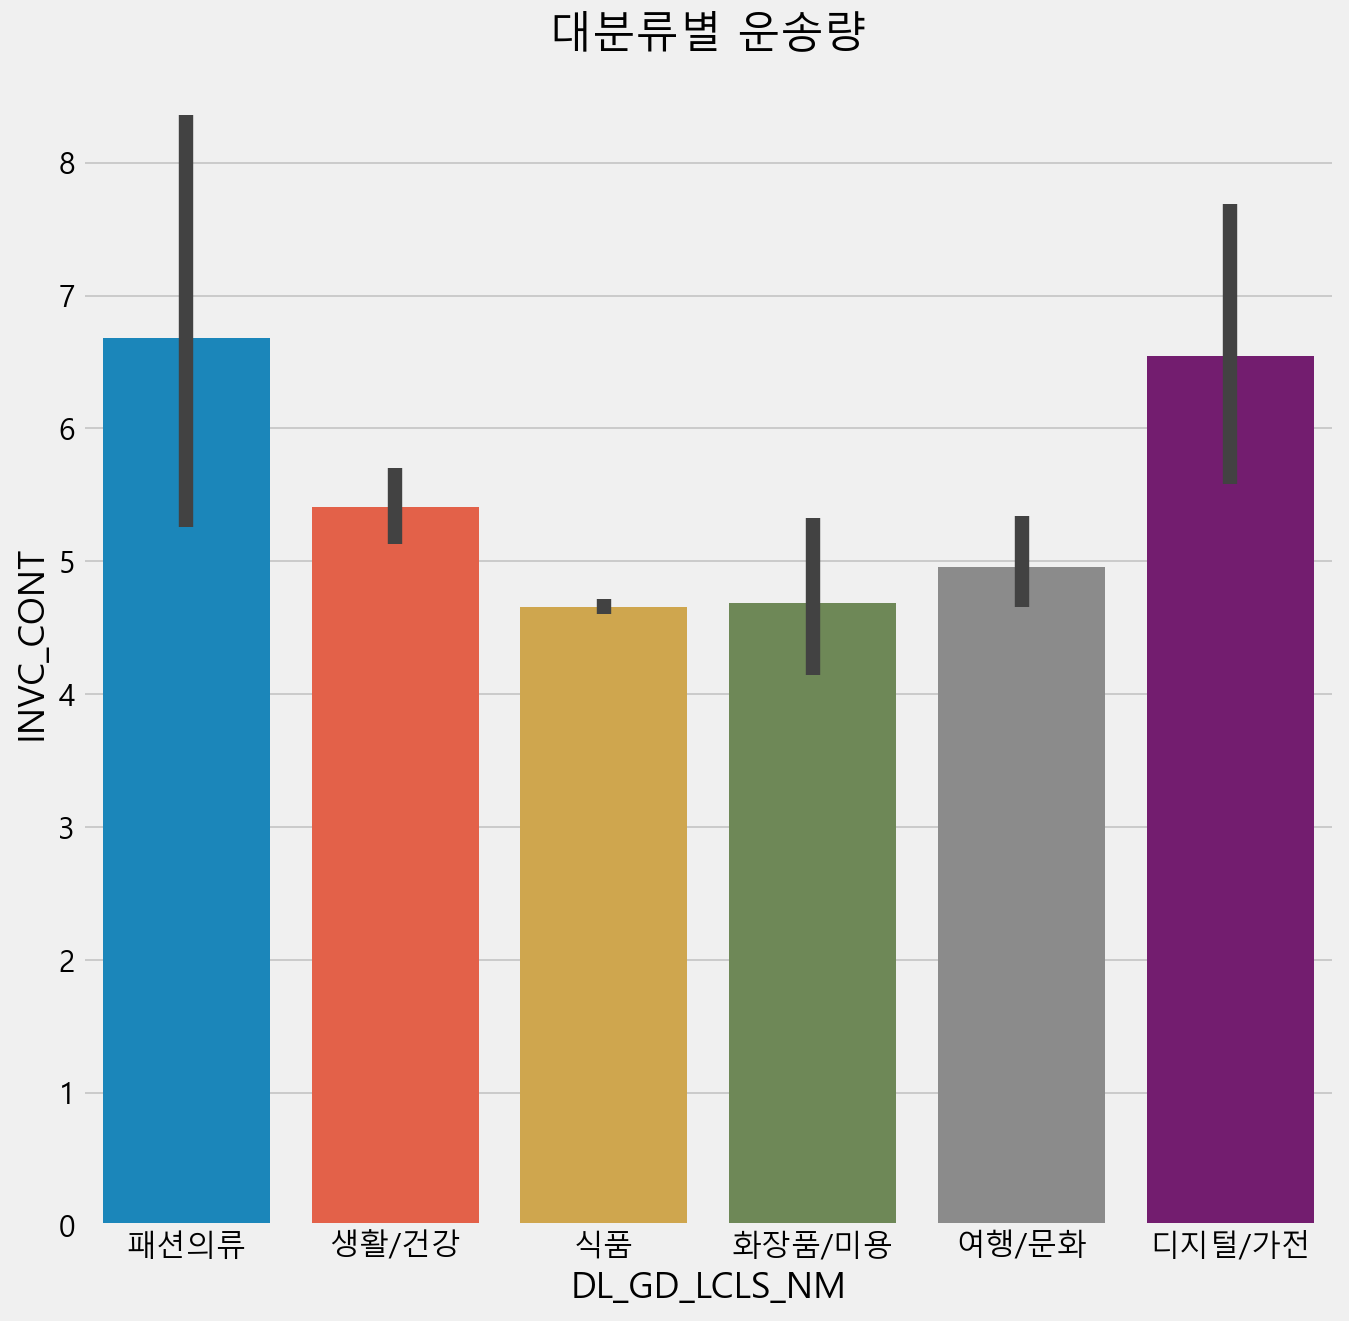

In [30]:
plt.figure(figsize=(10,10))

sns.barplot(x='DL_GD_LCLS_NM',y='INVC_CONT',data=train)
plt.title('대분류별 운송량')
plt.show()
#패션의류나 디지털/가전 대분류 품목의 운송량이 많다.

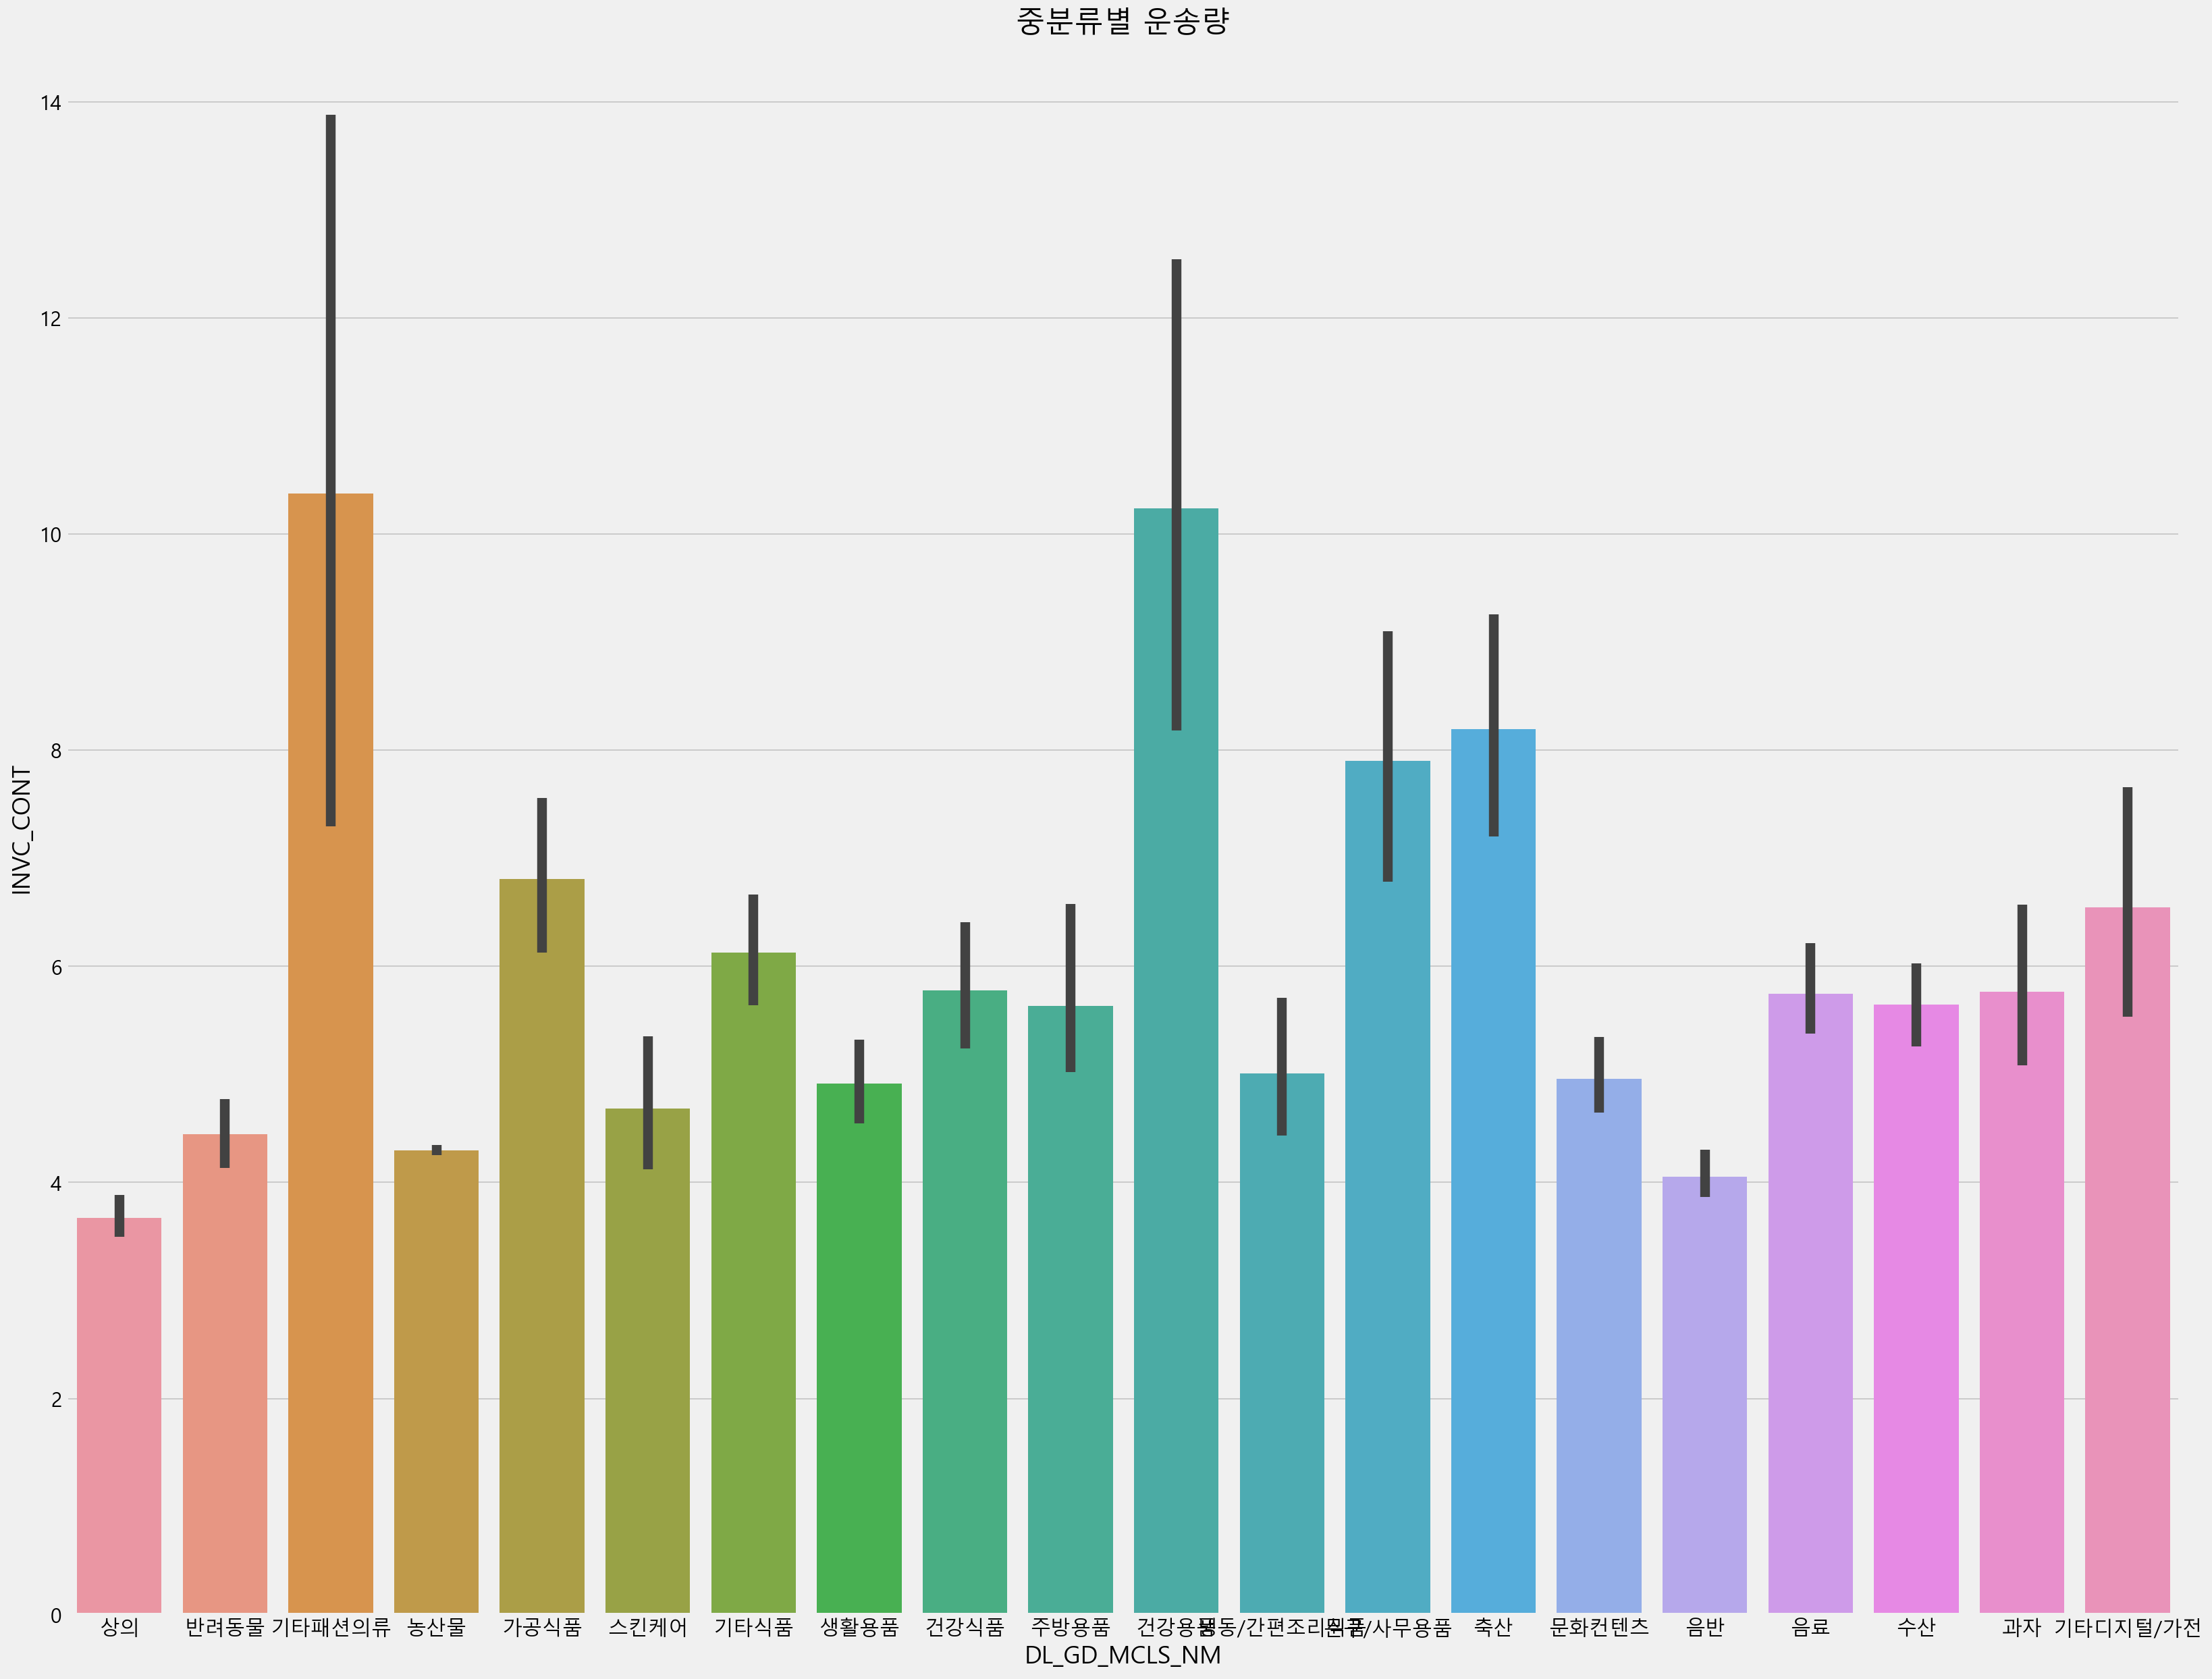

In [31]:
plt.figure(figsize=(25,20))

sns.barplot(x='DL_GD_MCLS_NM',y='INVC_CONT',data=train)
plt.title('중분류별 운송량')
plt.show()
#기타패션의류나 건강용품의 운송량이 많다.
#상의나 음반의 운송량이 적다.

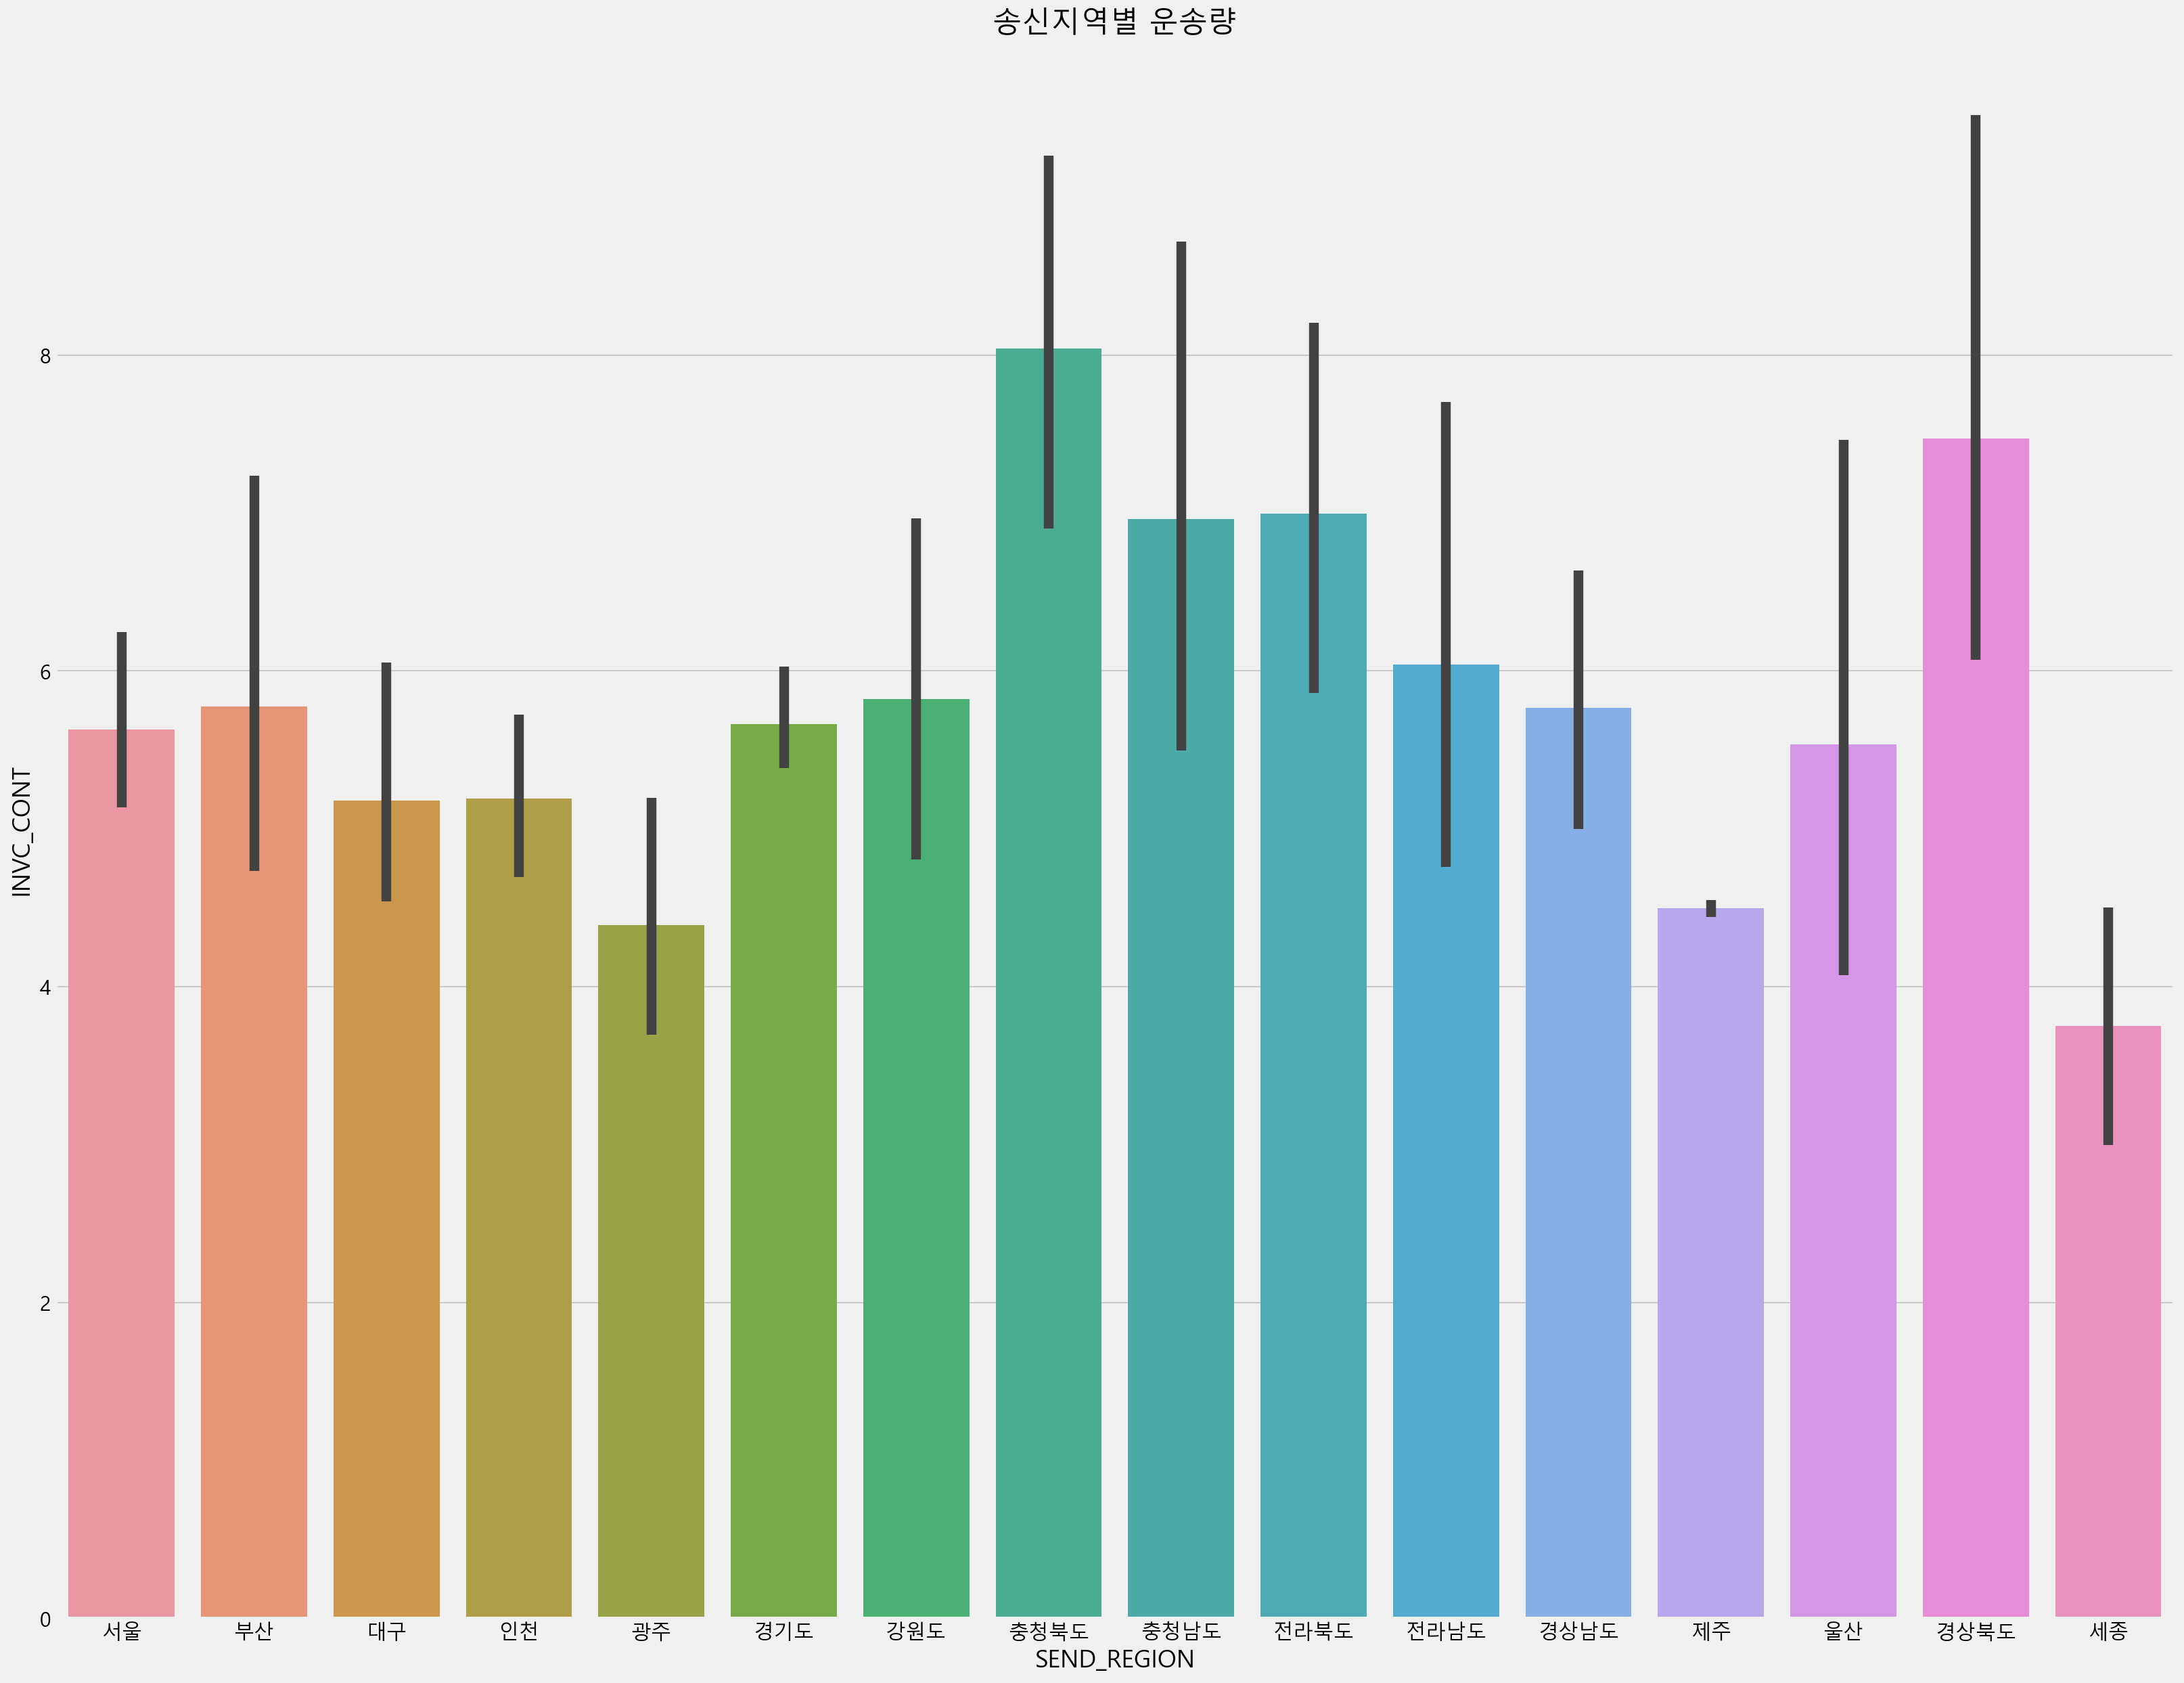

In [32]:
plt.figure(figsize=(25,20))

sns.barplot(x='SEND_REGION',y='INVC_CONT',data=train)
plt.title('송신지역별 운송량')
plt.show()

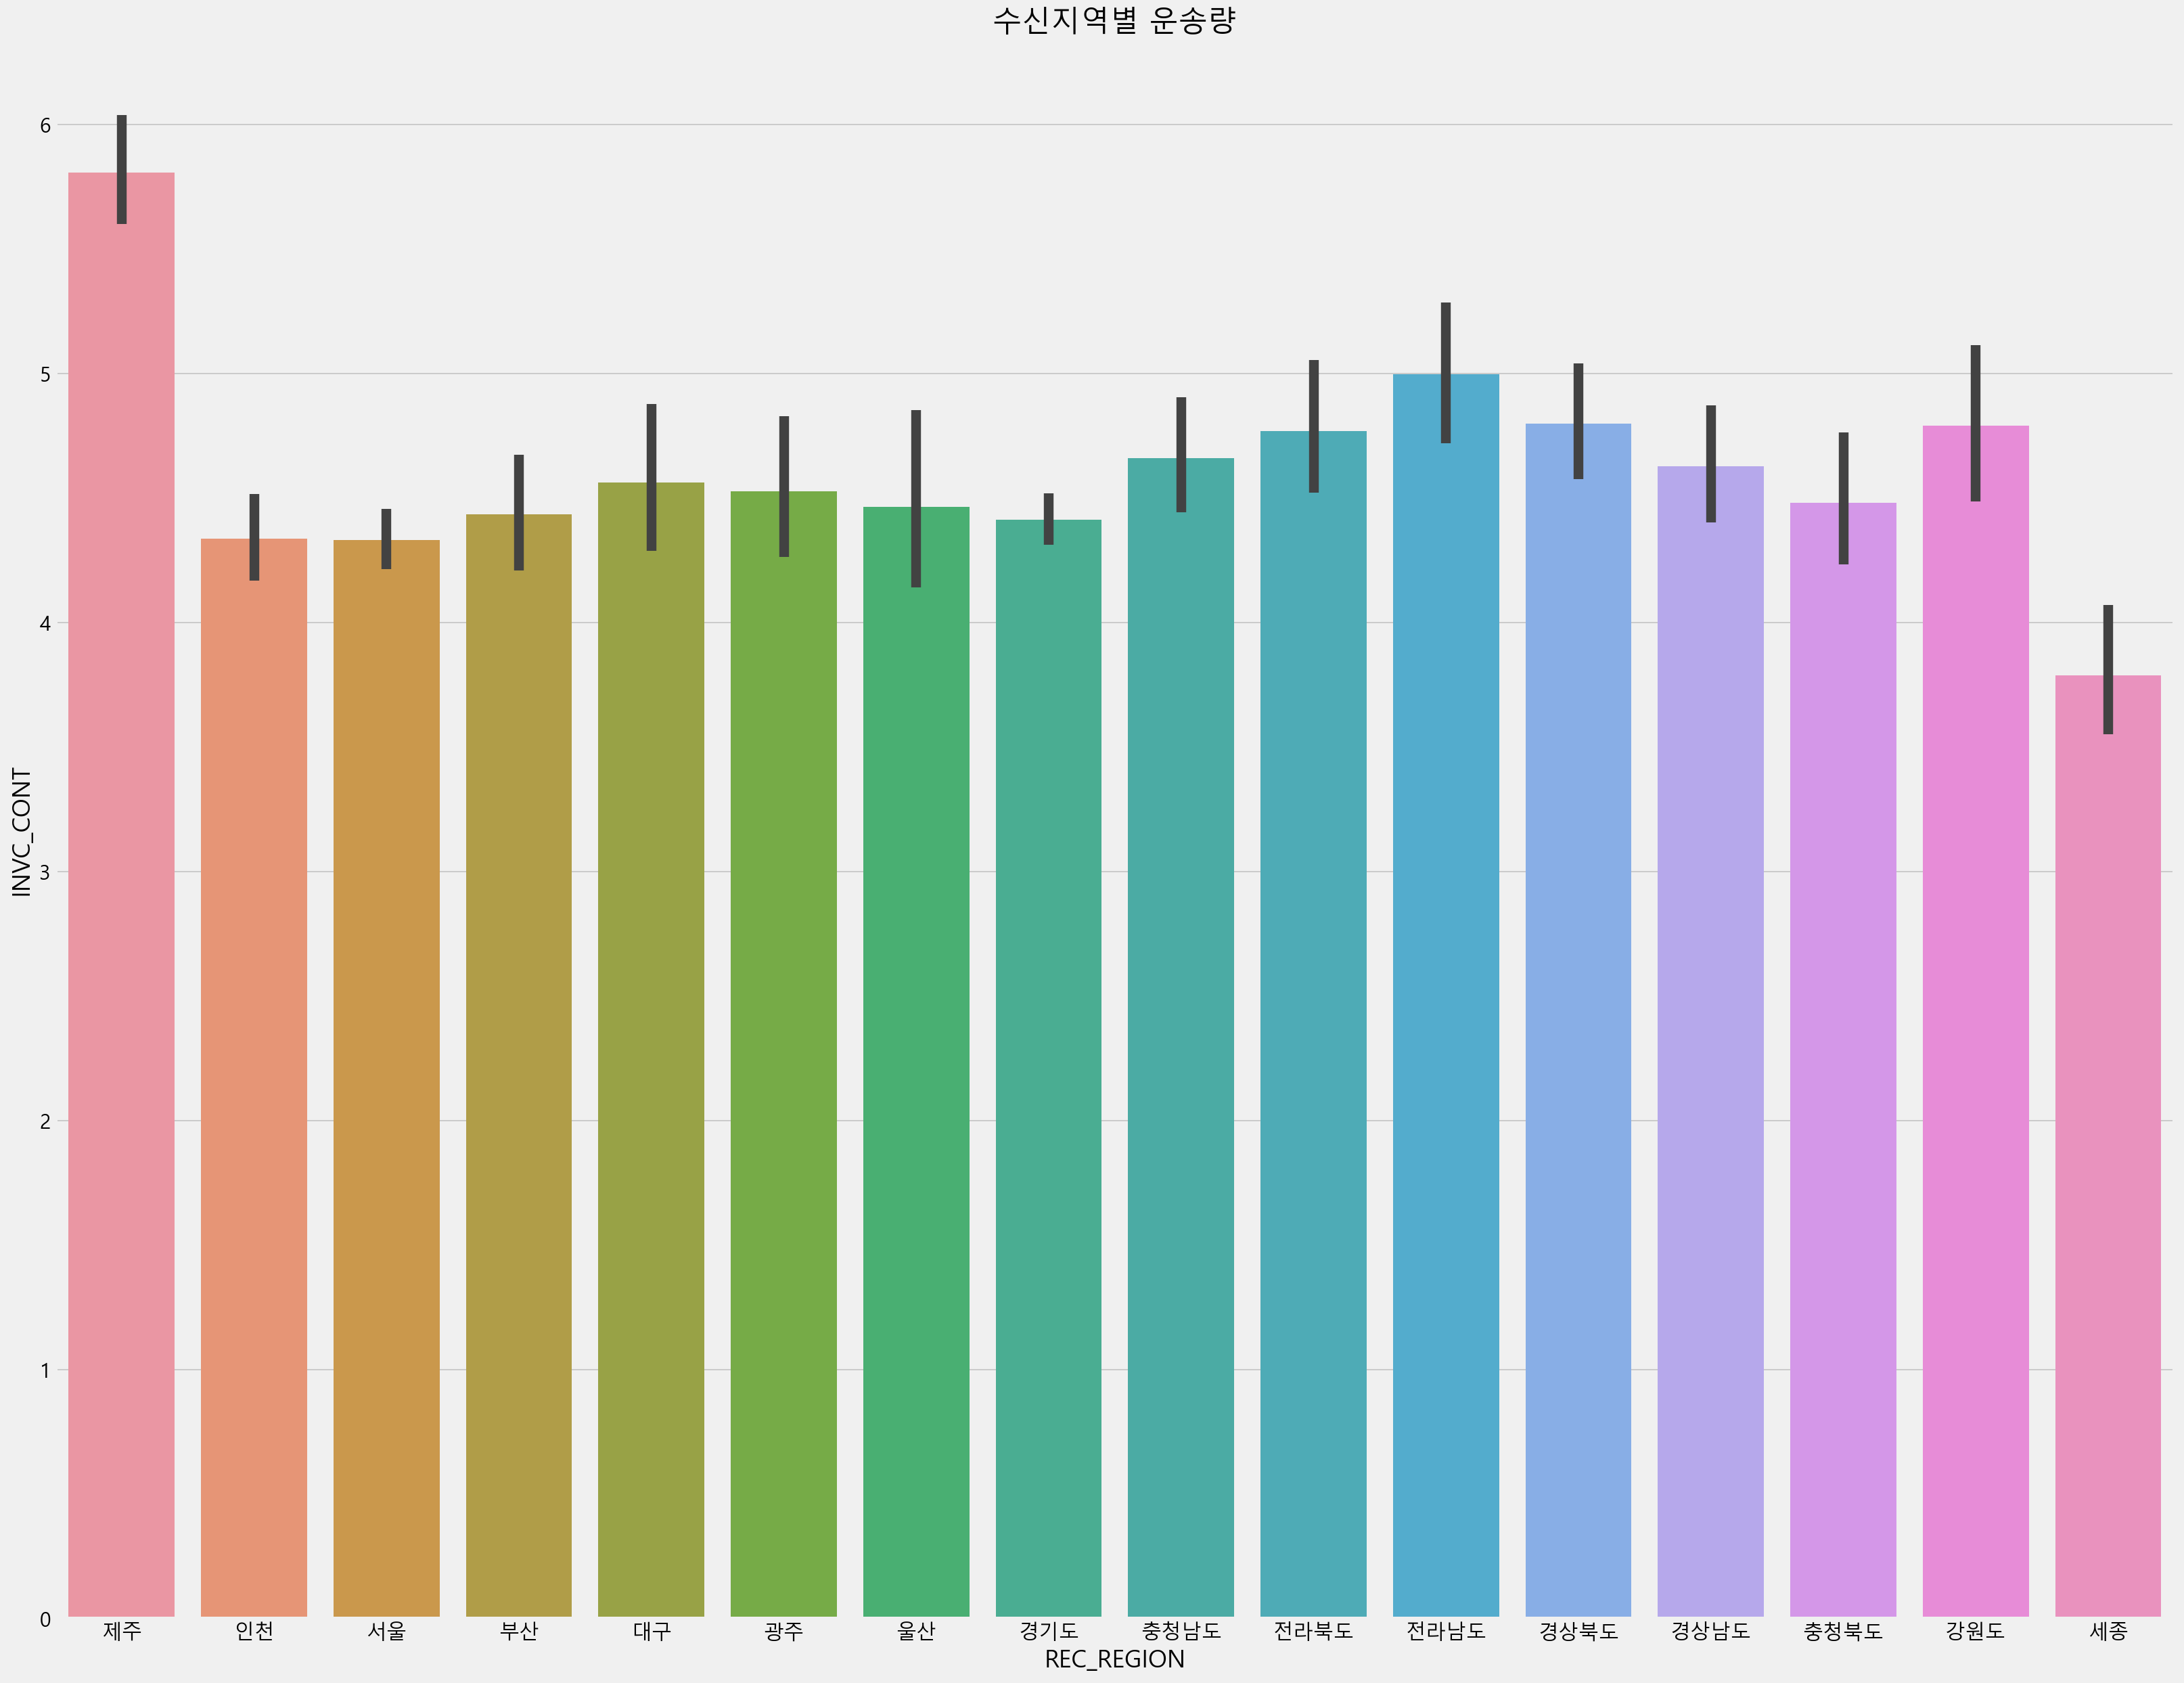

In [33]:
plt.figure(figsize=(25,20))

sns.barplot(x='REC_REGION',y='INVC_CONT',data=train)
plt.title('수신지역별 운송량')
plt.show()

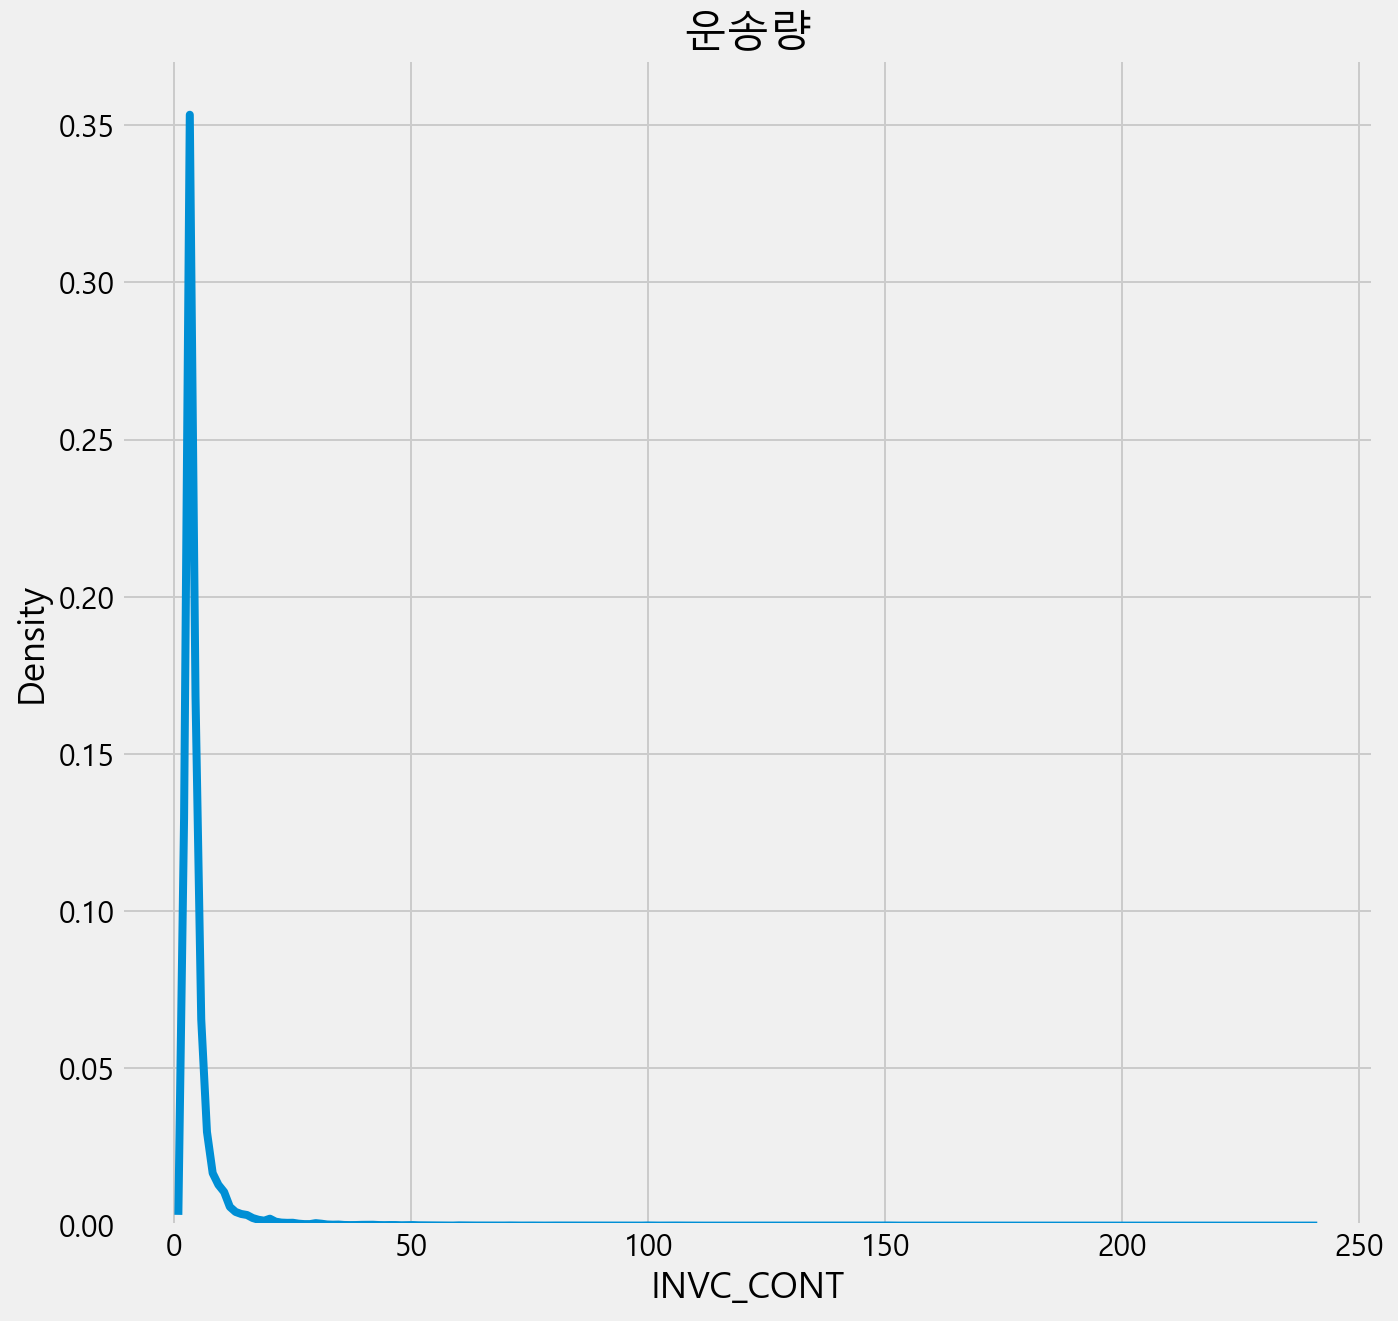

In [34]:
plt.figure(figsize=(10,10))
x = train['INVC_CONT']
sns.kdeplot(x)
plt.title("운송량")
plt.show()

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='INVC_CONT', ylabel='Density'>

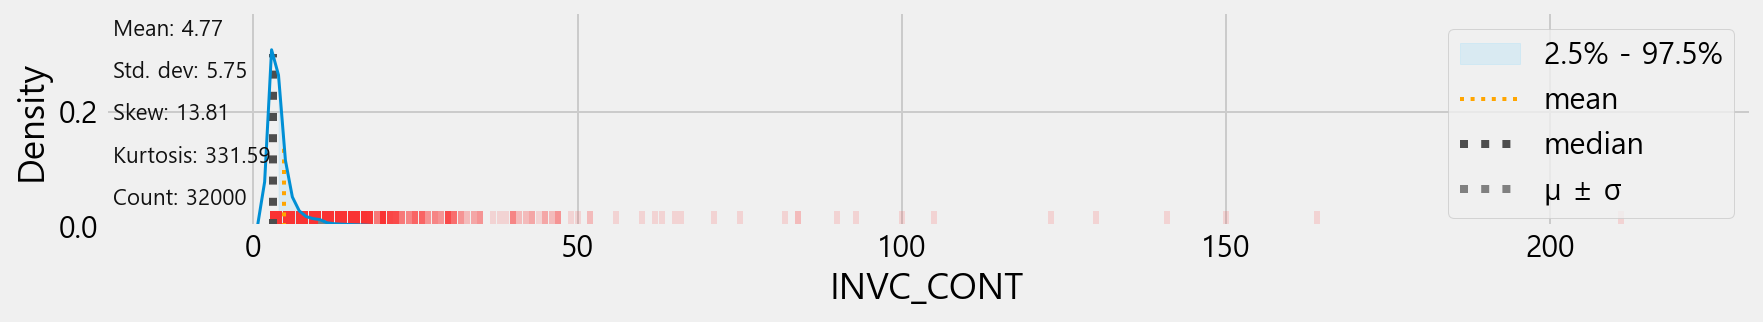

In [35]:
klib.dist_plot(train['INVC_CONT'])

In [36]:
print(train['INVC_CONT'].describe())
#값이 작은쪽으로 치우친 분포를 보임
#정규화가 필요할 수도 있다고 생각

count    32000.000000
mean         4.767875
std          5.752122
min          3.000000
25%          3.000000
50%          3.000000
75%          5.000000
max        239.000000
Name: INVC_CONT, dtype: float64


In [37]:
train.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,SEND_SPG_NM,SEND_SIGUNGU_NM,SEND_REGION,REC_SPG_NM,REC_SIGUNGU_NM,REC_REGION,INVC_CONT
0,0,1129000014045300,5011000220046300,패션의류,상의,다사6156,성북구,서울,다다1502,제주시,제주,3
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,다사6163,노원구,서울,다다1903,제주시,제주,3
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,다사6158,노원구,서울,다다1001,제주시,제주,9
3,3,1154500002014200,5011000315087400,식품,농산물,다사4541,금천구,서울,다다0600,제주시,제주,10
4,4,1165000021008300,5011000177051200,식품,가공식품,다사5942,서초구,서울,다다1803,제주시,제주,3


In [38]:
train['DL_GD_LCLS_NM'].value_counts()
#식품이 가장 많고 운송량도 균일함

식품        27738
생활/건강      2020
여행/문화      1192
패션의류        582
디지털/가전      241
화장품/미용      227
Name: DL_GD_LCLS_NM, dtype: int64

In [39]:
train['DL_GD_MCLS_NM'].value_counts()
#농산물이 가장 많고 운송량도 균일함

농산물          22162
문화컨텐츠         1192
음료            1126
수산             931
가공식품           923
기타식품           766
건강식품           651
음반             635
축산             418
냉동/간편조리식품      413
반려동물           358
과자             348
생활용품           343
주방용품           328
상의             321
기타패션의류         261
기타디지털/가전       241
스킨케어           227
문구/사무용품        180
건강용품           176
Name: DL_GD_MCLS_NM, dtype: int64

In [40]:
train['SEND_REGION'].value_counts()

제주      25344
경기도      3950
서울        859
인천        363
부산        187
대구        185
충청북도      184
충청남도      175
경상북도      171
전라북도      163
전라남도      124
강원도       118
경상남도       99
광주         46
울산         28
세종          4
Name: SEND_REGION, dtype: int64

In [41]:
train['REC_REGION'].value_counts()

경기도     7061
제주      6833
서울      4984
인천      2101
부산      1548
경상남도    1397
충청남도    1193
경상북도    1138
전라북도     942
대구       911
전라남도     885
강원도      874
충청북도     770
광주       636
울산       544
세종       183
Name: REC_REGION, dtype: int64

In [42]:
#전반적으로 대분류 및 중분류에선 
#빈도 수가 많을수록 운송량이 적고 편차가 적다

In [43]:
train['SAME_SPG'] = train['SEND_SPG_NM'] == train['REC_SPG_NM']
train['SAME_SPG'] = train['SAME_SPG'].astype(int)
train['SAME_SPG']
#SEND_SPG_NM 과 REC_SPG_NM이 같은 지 여부

0        0
1        0
2        0
3        0
4        0
        ..
31995    0
31996    0
31997    0
31998    0
31999    0
Name: SAME_SPG, Length: 32000, dtype: int32

In [44]:
test['SAME_SPG'] = test['SEND_SPG_NM'] == test['REC_SPG_NM']
test['SAME_SPG'] = test['SAME_SPG'].astype(int)
test['SAME_SPG']

0       0
1       0
2       0
3       0
4       0
       ..
4635    0
4636    0
4637    0
4638    0
4639    0
Name: SAME_SPG, Length: 4640, dtype: int32

In [45]:
train['SAME_SIGUNGU'] = train['SEND_SIGUNGU_NM'] == train['REC_SIGUNGU_NM']
train['SAME_SIGUNGU'] = train['SAME_SIGUNGU'].astype(int)
train['SAME_SIGUNGU']
#SEND_SIGUNGU_NM 과 REC_SIGUNGU_NM 같은 지 여부

0        0
1        0
2        0
3        0
4        0
        ..
31995    0
31996    0
31997    0
31998    0
31999    0
Name: SAME_SIGUNGU, Length: 32000, dtype: int32

In [46]:
test['SAME_SIGUNGU'] = test['SEND_SIGUNGU_NM'] == test['REC_SIGUNGU_NM']
test['SAME_SIGUNGU'] = test['SAME_SIGUNGU'].astype(int)
test['SAME_SIGUNGU']

0       0
1       0
2       0
3       0
4       0
       ..
4635    0
4636    0
4637    0
4638    0
4639    0
Name: SAME_SIGUNGU, Length: 4640, dtype: int32

In [47]:
train['SAME_REGION'] = train['SEND_REGION'] == train['REC_REGION']
train['SAME_REGION'] = train['SAME_REGION'].astype(int)
train['SAME_REGION']
#SEND_REGION 과 REC_REGION 같은 지 여부

0        0
1        0
2        0
3        0
4        0
        ..
31995    0
31996    0
31997    0
31998    0
31999    0
Name: SAME_REGION, Length: 32000, dtype: int32

In [48]:
test['SAME_REGION'] = test['SEND_REGION'] == test['REC_REGION']
test['SAME_REGION'] = test['SAME_REGION'].astype(int)
test['SAME_REGION']

0       0
1       0
2       0
3       0
4       0
       ..
4635    0
4636    0
4637    0
4638    0
4639    0
Name: SAME_REGION, Length: 4640, dtype: int32

In [49]:
train['SAME_INNB'] = train['SEND_SPG_INNB'] == train['REC_SPG_INNB']
train['SAME_INNB'] = train['SAME_INNB'].astype(int)
train['SAME_INNB']
#SEND_SPG_INNB 과 REC_SPG_INNB 같은 지 여부

0        0
1        0
2        0
3        0
4        0
        ..
31995    0
31996    0
31997    0
31998    0
31999    0
Name: SAME_INNB, Length: 32000, dtype: int32

In [50]:
test['SAME_INNB'] = test['SEND_SPG_INNB'] == test['REC_SPG_INNB']
test['SAME_INNB'] = test['SAME_INNB'].astype(int)
test['SAME_INNB']

0       0
1       0
2       0
3       0
4       0
       ..
4635    0
4636    0
4637    0
4638    0
4639    0
Name: SAME_INNB, Length: 4640, dtype: int32

In [51]:
train['SAME_TOTAL'] = train['SAME_SPG'] + train['SAME_SIGUNGU'] + train['SAME_REGION'] + train['SAME_INNB'] 
train['SAME_TOTAL'] = train['SAME_TOTAL'].astype(int)
train['SAME_TOTAL']
#여부 변수 총합

0        0
1        0
2        0
3        0
4        0
        ..
31995    0
31996    0
31997    0
31998    0
31999    0
Name: SAME_TOTAL, Length: 32000, dtype: int32

In [52]:
test['SAME_TOTAL'] = test['SAME_SPG'] + test['SAME_SIGUNGU'] + test['SAME_REGION'] + test['SAME_INNB'] 
test['SAME_TOTAL'] = test['SAME_TOTAL'].astype(int)
test['SAME_TOTAL']

0       0
1       0
2       0
3       0
4       0
       ..
4635    0
4636    0
4637    0
4638    0
4639    0
Name: SAME_TOTAL, Length: 4640, dtype: int32

In [53]:
train

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,SEND_SPG_NM,SEND_SIGUNGU_NM,SEND_REGION,REC_SPG_NM,REC_SIGUNGU_NM,REC_REGION,INVC_CONT,SAME_SPG,SAME_SIGUNGU,SAME_REGION,SAME_INNB,SAME_TOTAL
0,0,1129000014045300,5011000220046300,패션의류,상의,다사6156,성북구,서울,다다1502,제주시,제주,3,0,0,0,0,0
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,다사6163,노원구,서울,다다1903,제주시,제주,3,0,0,0,0,0
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,다사6158,노원구,서울,다다1001,제주시,제주,9,0,0,0,0,0
3,3,1154500002014200,5011000315087400,식품,농산물,다사4541,금천구,서울,다다0600,제주시,제주,10,0,0,0,0,0
4,4,1165000021008300,5011000177051200,식품,가공식품,다사5942,서초구,서울,다다1803,제주시,제주,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,31995,5011001060063300,2635000026053400,식품,농산물,나나8483,제주시,제주,마라4789,해운대구,부산,6,0,0,0,0,0
31996,31996,5011001095042400,1168000017002200,식품,기타식품,나나8581,제주시,제주,다사6044,강남구,서울,5,0,0,0,0,0
31997,31997,5011001108036200,4119700008012100,식품,농산물,나나8380,제주시,제주,다사3841,부천시소사구,경기도,9,0,0,0,0,0
31998,31998,5011001115011400,1132000015085100,식품,농산물,나나7779,제주시,제주,다사5861,도봉구,서울,3,0,0,0,0,0


In [54]:
test

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,SEND_SPG_NM,SEND_SIGUNGU_NM,SEND_REGION,REC_SPG_NM,REC_SIGUNGU_NM,REC_REGION,SAME_SPG,SAME_SIGUNGU,SAME_REGION,SAME_INNB,SAME_TOTAL
0,32000,5013000043028400,1165000021097200,식품,농산물,다나4294,서귀포시,제주,다사5942,서초구,서울,0,0,0,0,0
1,32001,5013000044016100,1154500002066400,식품,농산물,다나4394,서귀포시,제주,다사4541,금천구,서울,0,0,0,0,0
2,32002,5013000205030200,4139000102013200,식품,농산물,다나4187,서귀포시,제주,다사3029,시흥시,경기도,0,0,0,0,0
3,32003,5013000205030200,4221000040093400,식품,농산물,다나4187,서귀포시,제주,라아9121,속초시,강원도,0,0,0,0,0
4,32004,5013000268011400,2726000004017100,식품,농산물,다나3285,서귀포시,제주,마마0564,수성구,대구,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,36635,5013000858004400,4725000719072200,식품,농산물,다나0473,서귀포시,제주,라바5923,상주시,경상북도,0,0,0,0,0
4636,36636,5013000870018300,2826000106075300,식품,농산물,다나1673,서귀포시,제주,다사2548,서구,인천,0,0,0,0,0
4637,36637,5013000897086300,4311100034004300,식품,농산물,나나9472,서귀포시,제주,다바9950,청주시상당구,충청북도,0,0,0,0,0
4638,36638,5013000902065100,4145000013011200,식품,농산물,다나0472,서귀포시,제주,다사7250,하남시,경기도,0,0,0,0,0


In [55]:
train.drop(columns=['INVC_CONT'],inplace=True)

#### SEND_SPG_INNB Word2Vec

In [ ]:
train['SEND_SPG_INNB'] = train['SEND_SPG_INNB'].astype(str)
test['SEND_SPG_INNB'] = test['SEND_SPG_INNB'].astype(str)

In [ ]:
import random
train_data = list(train.groupby('index')['SEND_SPG_INNB'].unique())
test_data = list(test.groupby('index')['SEND_SPG_INNB'].unique())

In [ ]:
def oversample(x, n):
    lst = []
    for i in x:
        tmp = []
        for j in range(n):
            random.shuffle(i)
            tmp += list(i)
            lst.append(tmp)
    return lst

In [ ]:
w2v_input = oversample(train_data, 10)

In [ ]:
from gensim.models import word2vec
w2v = word2vec.Word2Vec(sentences = w2v_input, size = 60, window = 7, min_count = 1, sg = 1)

In [ ]:
train_mean_vector1 = []
for words in tqdm(train_data):
    tmp = np.zeros(60)
    cnt = 0
    for word in words:
        try:
            tmp += w2v[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    train_mean_vector1.append(tmp)
train_mean_vector1 = np.array(train_mean_vector1)

In [ ]:
test_mean_vector1 = []
for words in tqdm(test_data):
    tmp = np.zeros(60)
    cnt = 0
    for word in words:
        try:
            tmp += w2v[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    test_mean_vector1.append(tmp)
test_mean_vector1 = np.array(test_mean_vector1)

#### REC_SPG_INNB Word2Vec

In [ ]:
train['REC_SPG_INNB'] = train['REC_SPG_INNB'].astype(str)
test['REC_SPG_INNB'] = test['REC_SPG_INNB'].astype(str)

In [ ]:
import random

train_data = list(train.groupby('index')['REC_SPG_INNB'].unique())
test_data = list(test.groupby('index')['REC_SPG_INNB'].unique())

In [ ]:
w2v_input = oversample(train_data, 10)

In [ ]:
from gensim.models import word2vec
w2v = word2vec.Word2Vec(sentences = w2v_input, size = 60, window = 7, min_count = 1, sg = 1)

In [ ]:
train_mean_vector2 = []
for words in tqdm(train_data):
    tmp = np.zeros(60)
    cnt = 0
    for word in words:
        try:
            tmp += w2v[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    train_mean_vector2.append(tmp)
train_mean_vector2 = np.array(train_mean_vector2)

In [ ]:
test_mean_vector2 = []
for words in tqdm(test_data):
    tmp = np.zeros(60)
    cnt = 0
    for word in words:
        try:
            tmp += w2v[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    test_mean_vector2.append(tmp)
test_mean_vector2 = np.array(test_mean_vector2)

In [ ]:
train_mean_vector1 = pd.DataFrame(train_mean_vector1)
train_mean_vector1.columns = train_mean_vector1.columns.astype(str) + '_SEND'

test_mean_vector1 = pd.DataFrame(test_mean_vector1)
test_mean_vector1.columns = test_mean_vector1.columns.astype(str) + '_SEND'

train_mean_vector2 = pd.DataFrame(train_mean_vector2)
train_mean_vector2.columns = train_mean_vector2.columns.astype(str) + '_REC'

test_mean_vector2 = pd.DataFrame(test_mean_vector2)
test_mean_vector2.columns = test_mean_vector2.columns.astype(str) + '_REC'

In [ ]:
train = pd.concat([train,train_mean_vector1,train_mean_vector2],axis=1)
test = pd.concat([test,test_mean_vector1,test_mean_vector2],axis=1)

display(train)
display(test)

In [ ]:
train = train.fillna(0)
test = test.fillna(0)
train = train.replace([np.inf, -np.inf], 0)
test = test.replace([np.inf, -np.inf], 0)

In [ ]:
train.drop(columns=['index','SEND_SPG_INNB','REC_SPG_INNB'],inplace=True)
test.drop(columns=['index','SEND_SPG_INNB','REC_SPG_INNB'],inplace=True)

In [56]:
train = pd.read_csv('features.csv')
test = pd.read_csv('features_te.csv')

In [57]:
train

,DL_GD_LCLS_NM,DL_GD_MCLS_NM,SEND_SPG_NM,SEND_SIGUNGU_NM,SEND_REGION,REC_SPG_NM,REC_SIGUNGU_NM,REC_REGION,SAME_SPG,SAME_SIGUNGU,SAME_REGION,SAME_INNB,SAME_TOTAL,0_SEND,1_SEND,2_SEND,3_SEND,4_SEND,5_SEND,6_SEND,7_SEND,8_SEND,9_SEND,10_SEND,11_SEND,12_SEND,13_SEND,14_SEND,15_SEND,16_SEND,17_SEND,18_SEND,19_SEND,20_SEND,21_SEND,22_SEND,23_SEND,24_SEND,25_SEND,26_SEND,27_SEND,28_SEND,29_SEND,30_SEND,31_SEND,32_SEND,33_SEND,34_SEND,35_SEND,36_SEND,37_SEND,38_SEND,39_SEND,40_SEND,41_SEND,42_SEND,43_SEND,44_SEND,45_SEND,46_SEND,47_SEND,48_SEND,49_SEND,50_SEND,51_SEND,52_SEND,53_SEND,54_SEND,55_SEND,56_SEND,57_SEND,58_SEND,59_SEND,0_REC,1_REC,2_REC,3_REC,4_REC,5_REC,6_REC,7_REC,8_REC,9_REC,10_REC,11_REC,12_REC,13_REC,14_REC,15_REC,16_REC,17_REC,18_REC,19_REC,20_REC,21_REC,22_REC,23_REC,24_REC,25_REC,26_REC,27_REC,28_REC,29_REC,30_REC,31_REC,32_REC,33_REC,34_REC,35_REC,36_REC,37_REC,38_REC,39_REC,40_REC,41_REC,42_REC,43_REC,44_REC,45_REC,46_REC,47_REC,48_REC,49_REC,50_REC,51_REC,52_REC,53_REC,54_REC,55_REC,56_REC,57_REC,58_REC,59_REC
0,패션의류,상의,다사6156,성북구,서울,다다1502,제주시,제주,0,0,0,0,0,0.270803,0.470946,-0.798906,-0.174607,0.729376,-0.286474,-0.993666,-0.338297,-0.991324,0.808805,-0.639363,0.312729,-0.668440,-0.488088,-0.607437,-0.661169,-0.127948,0.752098,0.037889,0.219213,0.763264,-0.859477,-0.951506,-0.137856,-0.201792,-0.218897,-0.497222,-0.303244,0.311606,-0.772277,-0.197755,0.391103,0.360083,0.941351,0.627904,0.800358,0.155347,-0.573402,-0.563125,-0.244376,0.405561,-0.301566,-0.144570,-0.581744,0.631272,1.006800,0.368660,0.186132,0.768990,0.666055,0.253111,-0.900595,1.047993,-0.997301,-0.801265,-0.007724,-0.335743,0.712346,-0.262388,0.114525,-0.092605,0.949702,0.396824,0.017226,-0.874784,0.790671,-0.492234,0.960549,0.591816,0.174632,0.676111,-0.041838,0.696469,0.679606,-0.256076,-0.228357,0.433602,-0.223229,-0.709046,0.313612,0.663225,-0.648961,-0.990855,0.837940,0.424225,1.128493,-0.980197,-0.267192,-0.657865,0.059018,-0.433298,0.662061,0.019296,0.975091,0.482508,0.583743,-0.868034,0.799066,-1.013440,-1.014229,0.036388,0.862324,0.168442,-0.632148,-1.095894,-1.018371,-0.282208,0.223823,0.673673,0.652471,-0.256049,0.636761,0.509615,-0.287270,-0.432885,0.553113,-0.123378,-0.789360,0.015099,0.525502
1,생활/건강,반려동물,다사6163,노원구,서울,다다1903,제주시,제주,0,0,0,0,0,0.161975,0.384115,-0.651858,-0.190615,0.775561,-0.297699,-0.837594,-0.298656,-0.805973,0.609402,-0.615080,0.360038,-0.768112,-0.345854,-0.569533,-0.619611,-0.110720,0.674931,-0.061368,0.290859,0.642854,-0.724290,-0.761584,-0.101060,-0.199193,-0.130618,-0.473081,-0.231614,0.450232,-0.626179,-0.248736,0.432577,0.382918,1.004688,0.730050,0.763528,0.066426,-0.427231,-0.518227,-0.292456,0.368310,-0.470957,-0.080891,-0.628326,0.744795,1.001110,0.359062,0.124841,0.743831,0.621563,0.115482,-0.802778,1.096283,-0.890038,-0.874758,0.082985,-0.337003,0.606077,-0.240772,0.022840,-0.714668,0.594649,-0.239877,-0.757783,0.128158,0.185663,-0.693929,-0.252778,-0.341013,-0.236384,0.233682,0.829728,-0.458818,-0.617908,0.721268,-0.722886,0.595660,-0.810636,0.017747,-0.525882,-0.225901,0.040879,-1.063004,-0.259681,-0.052947,0.733044,-0.015823,0.244959,-0.476134,-0.612294,-0.343183,-0.346682,0.940779,0.864647,0.155884,0.823867,-1.289509,0.532447,-0.926426,0.229255,0.610995,0.625544,-0.473040,0.428981,-0.545813,-0.291703,0.112801,-0.393895,-0.070136,-0.642550,-0.494836,-0.070653,0.096155,-0.016172,-0.654911,1.096265,0.601172,0.005944,0.197443,0.545194
2,패션의류,기타패션의류,다사6158,노원구,서울,다다1001,제주시,제주,0,0,0,0,0,0.201939,0.383410,-0.670025,-0.126244,0.692197,-0.237296,-0.831025,-0.285363,-0.784706,0.653046,-0.507773,0.298003,-0.667101,-0.400204,-0.512566,-0.566358,-0.122709,0.639242,0.007849,0.176528,0.608944,-0.720765,-0.724669,-0.113037,-0.220434,-0.163588,-0.417705,-0.229157,0.263211,-0.590503,-0.214875,0.368744,0.345867,0.857472,0.602361,0.682466,0.021097,-0.456772,-0.523541,-0.255181,0.406973,-0.409185,-0.048699,-0.562227,0.630613,0.854916,0.394747,0.180401,0.628786,0.592409,0.203746,-0.797904,0.904241,-0.794998,-0.75377

#### KMeans Clustering

In [ ]:
train_kmeans = train.drop(columns=['SEND_SPG_NM','SEND_SIGUNGU_NM','SEND_REGION','REC_SPG_NM','REC_SIGUNGU_NM','REC_REGION'])
test_kmeans = test.drop(columns=['SEND_SPG_NM','SEND_SIGUNGU_NM','SEND_REGION','REC_SPG_NM','REC_SIGUNGU_NM','REC_REGION'])

In [ ]:
train_kmeans['DL_GD_LCLS_NM'] = train_kmeans['DL_GD_LCLS_NM'].astype('category')
train_kmeans['DL_GD_LCLS_NM'] = train_kmeans['DL_GD_LCLS_NM'].cat.codes
train_kmeans['DL_GD_MCLS_NM'] = train_kmeans['DL_GD_MCLS_NM'].astype('category')
train_kmeans['DL_GD_MCLS_NM'] = train_kmeans['DL_GD_MCLS_NM'].cat.codes

test_kmeans['DL_GD_LCLS_NM'] = test_kmeans['DL_GD_LCLS_NM'].astype('category')
test_kmeans['DL_GD_LCLS_NM'] = test_kmeans['DL_GD_LCLS_NM'].cat.codes
test_kmeans['DL_GD_MCLS_NM'] = test_kmeans['DL_GD_MCLS_NM'].astype('category')
test_kmeans['DL_GD_MCLS_NM'] = test_kmeans['DL_GD_MCLS_NM'].cat.codes

In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
from sklearn.metrics import silhouette_score
n_clusters = [4,5,6,7,8,9,10,11,12,13] 
clusters_inertia = [] 
s_scores = [] 

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++',random_state=0).fit(train_kmeans)
    clusters_inertia.append(KM_est.inertia_)    
    silhouette_avg = silhouette_score(train_kmeans, KM_est.labels_)
    s_scores.append(silhouette_avg) 

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(7, ls="--", c="red")
plt.grid()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(7, ls="--", c="red")
plt.grid()
plt.show()

In [ ]:
KM_7_clusters = KMeans(n_clusters=7, init='k-means++',random_state=0).fit(train_kmeans) # initialise and fit K-Means model

train_kmeans.loc[:,'Cluster'] = KM_7_clusters.labels_ # append labels to points

In [ ]:
KM7_clust_sizes = train_kmeans.groupby('Cluster').size().to_frame()
KM7_clust_sizes.columns = ["KM_size"]
KM7_clust_sizes

In [ ]:
n_clusters = [4,5,6,7,8,9,10,11,12,13] 
clusters_inertia = [] 
s_scores = [] 

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++',random_state=0).fit(test_kmeans)
    clusters_inertia.append(KM_est.inertia_)    
    silhouette_avg = silhouette_score(test_kmeans, KM_est.labels_)
    s_scores.append(silhouette_avg) 

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(7, ls="--", c="red")
plt.grid()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(7, ls="--", c="red")
plt.grid()
plt.show()

In [ ]:
KM_7_clusters = KMeans(n_clusters=7, init='k-means++',random_state=0).fit(test_kmeans) # initialise and fit K-Means model

test_kmeans.loc[:,'Cluster'] = KM_7_clusters.labels_ # append labels to points

In [ ]:
KM7_clust_sizes = test_kmeans.groupby('Cluster').size().to_frame()
KM7_clust_sizes.columns = ["KM_size"]
KM7_clust_sizes

In [ ]:
train_kmeans['Cluster'] = train_kmeans['Cluster'].astype('category')
test_kmeans['Cluster'] = test_kmeans['Cluster'].astype('category')

In [ ]:
train_cluster = train_kmeans['Cluster']
test_cluster = test_kmeans['Cluster']

In [ ]:
train['Cluster'] = train_cluster
test['Cluster'] = test_cluster

# Modeling

### CAT OOF

In [58]:
cat_features = ['DL_GD_LCLS_NM',
                'DL_GD_MCLS_NM',
                'SEND_SPG_NM',
                'SEND_SIGUNGU_NM',
                'SEND_REGION',
                'REC_SPG_NM',
                'REC_SIGUNGU_NM',
                'REC_REGION',
#                'Cluster'
               ]

In [59]:
def train_apps_all_with_oof(ftr, target, nfolds=6):
    ftr = train
    target = target

    # nfolds 개의 cross validatin fold set을 가지는 KFold 생성 
    folds = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=0)
    
    params = {'loss_function':'RMSE',
         }
    test_data = Pool(data=test,
                 cat_features=cat_features)
    
    # Out of Folds로 학습된 모델의 validation set을 예측하여 결과 확률을 담을 array 생성.
    oof_preds = np.zeros((ftr.shape[0],))  
    
    # Ouf of Folds로 학습된 모델의 test dataset을 예측하여 결과 확률을 담을 array 생성. 
    test_preds = np.zeros(((test.shape[0],)))
    
    clf = CatBoostRegressor(**params)

    # nfolds 번 cross validation Iteration 반복하면서 OOF 방식으로 학습 및 테스트 데이터 예측
    for fold_idx, (train_idx, valid_idx) in enumerate(folds.split(ftr,target)):
        print('##### iteration ', fold_idx, ' 시작')
        # 학습용 데이터 세트의 인덱스와 검증용 데이터 세트의 인덱스 추출하여 이를 기반으로 학습/검증 데이터 추출
        train_x = ftr.iloc[train_idx, :]
        train_y = target.iloc[train_idx]
        
        valid_x = ftr.iloc[valid_idx, :]
        valid_y = target.iloc[valid_idx]
        
        train_data = Pool(data=train_x, 
                          label=train_y,
                          cat_features=cat_features)
        valid_data = Pool(data=valid_x, 
                          label=valid_y,
                          cat_features=cat_features)
        
        # 추출된 학습/검증 데이터 세트로 모델 학습. early_stopping은 200으로 증가. 
        clf.fit(train_data, 
                eval_set=valid_data,
                use_best_model=True,
                verbose= 200, 
                early_stopping_rounds= 200)
        # 학습된 모델로 테스트 데이터 세트에 예측 확률 계산. 
        # nfolds 번 반복 실행하므로 평균 확률을 구하기 위해 개별 수행시 마다 수행 횟수로 나눈 확률을 추후에 더해서 최종 평균 확률 계산. 
        y_pred = clf.predict(test_data)
        test_preds += y_pred
        
    test_preds /= nfolds
        
        
    return clf, test_preds

In [60]:
clf, test_preds = train_apps_all_with_oof(train, target, nfolds=6)

##### iteration  0  시작
Learning rate set to 0.085265
0:	learn: 5.4856320	test: 6.7958234	best: 6.7958234 (0)	total: 221ms	remaining: 3m 40s
200:	learn: 4.7475659	test: 5.5004566	best: 5.5002444 (196)	total: 11.6s	remaining: 46.1s
400:	learn: 4.4505288	test: 5.4721513	best: 5.4710104 (394)	total: 23.3s	remaining: 34.8s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 5.471010395
bestIteration = 394

Shrink model to first 395 iterations.
##### iteration  1  시작
Learning rate set to 0.085265
0:	learn: 5.5891496	test: 6.2180818	best: 6.2180818 (0)	total: 47.9ms	remaining: 47.9s
200:	learn: 4.6902823	test: 5.4230591	best: 5.4223004 (195)	total: 11.3s	remaining: 44.8s
400:	learn: 4.4434871	test: 5.3787603	best: 5.3767572 (392)	total: 22.7s	remaining: 33.9s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 5.37675719
bestIteration = 392

Shrink model to first 393 iterations.
##### iteration  2  시작
Learning rate set to 0.085266
0:	learn: 5.7683444	test: 5.5081

### CAT Train_all

In [ ]:
from catboost import CatBoostRegressor, Pool
params = {'loss_function':'RMSE',
         }
test_data = Pool(data=test,
                 cat_features=cat_features)
clf = CatBoostRegressor(**params)

In [ ]:
train_data = Pool(data=train, 
            label=target,
            cat_features=cat_features)

In [ ]:
clf.fit(train_data, 
        use_best_model=True,
        verbose= 200, 
        early_stopping_rounds= 1000)

In [ ]:
test_preds = clf.predict(test)

In [61]:
submission['INVC_CONT'] = test_preds
submission

,index,INVC_CONT
0,32000,4.502875
1,32001,5.324466
2,32002,4.999515
3,32003,5.173539
4,32004,5.466061
...,...,...
4635,36635,4.801615
4636,36636,4.715806
4637,36637,4.046237
4638,36638,4.364632


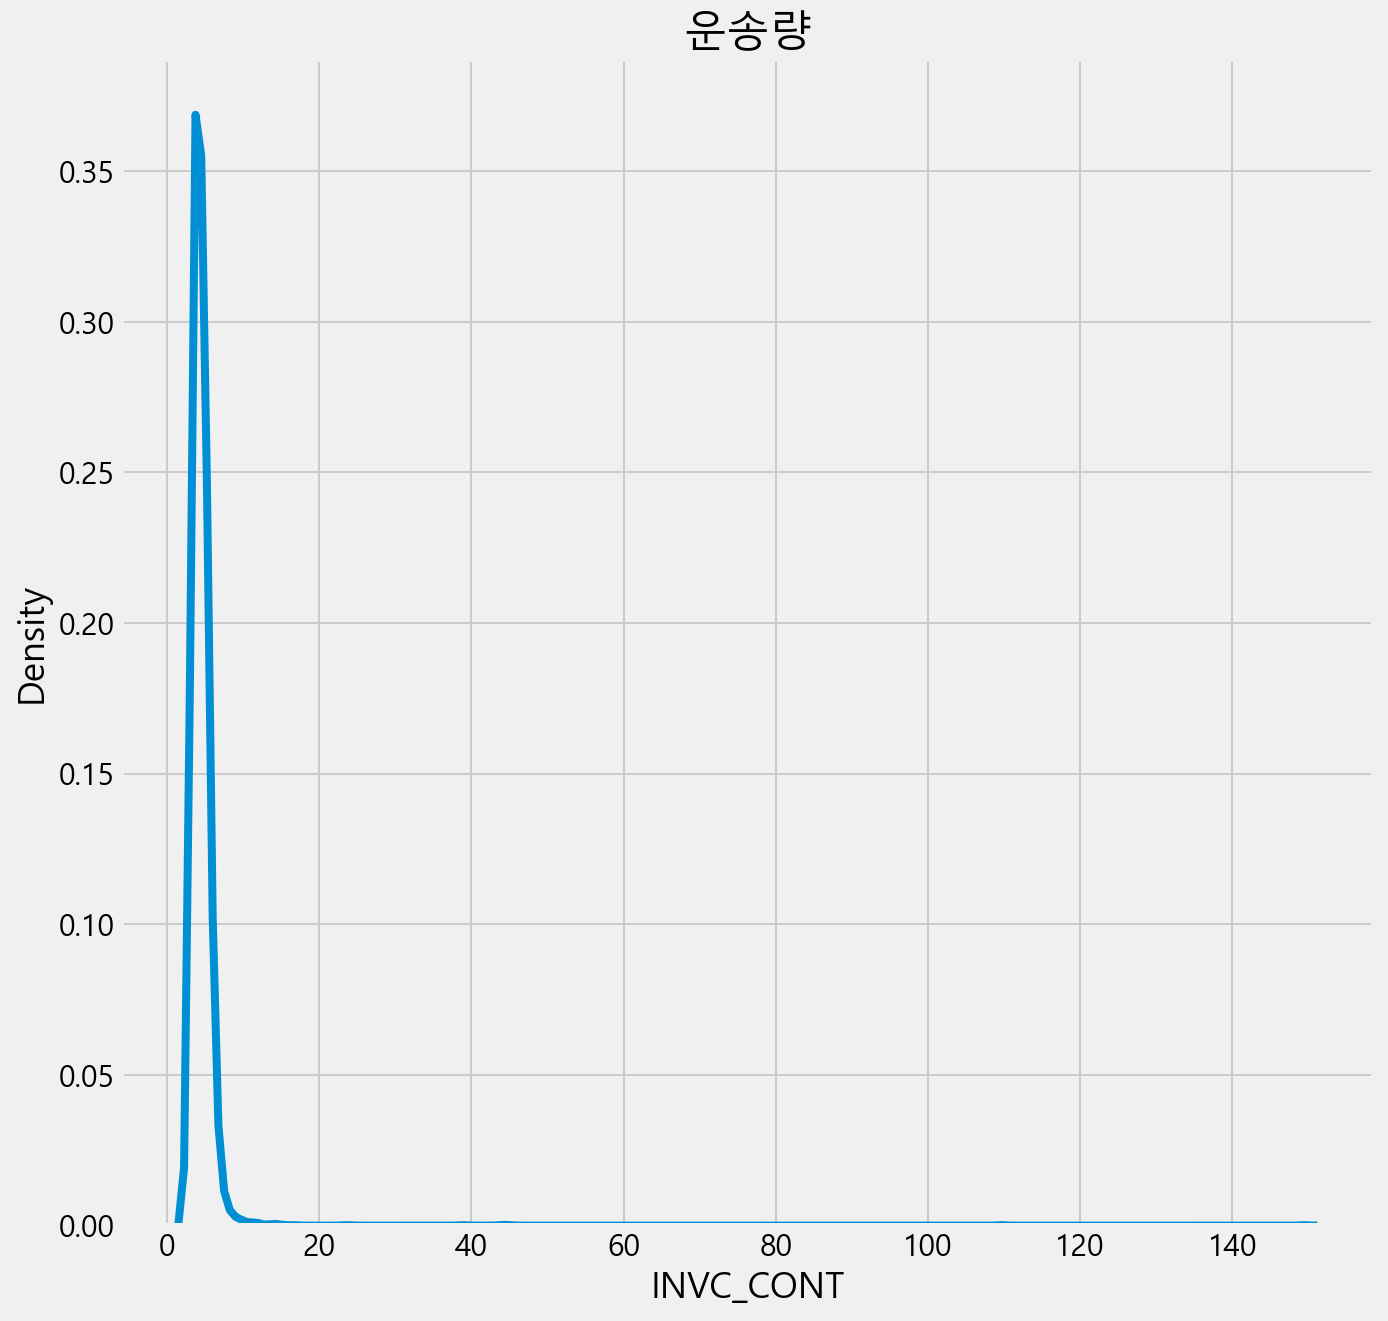

In [62]:
plt.figure(figsize=(10,10))
x = submission['INVC_CONT']
sns.kdeplot(x)
plt.title("운송량")
plt.show()

In [63]:
submission.describe()

,index,INVC_CONT
count,4640.000000,4640.000000
mean,34319.500000,4.515907
std,1339.596954,3.008030
min,32000.000000,3.132352
25%,33159.750000,3.594511
50%,34319.500000,4.339567
75%,35479.250000,4.915387
max,36639.000000,149.522132


In [ ]:
submission.to_csv('cat_oof3.csv',index=False)